#### Duvivier Valentin - MU4MES03 - 11/02/2021

Beam - plan case - Timoshenko

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
# Data

# Geometry
L = 10**-1    # [m] length beam
d = 5*10**-4  # [m] diameter section

# Forces
m = 0.015     # [kg] mass of added ball at extremity
g = 9.81      # [N]
P = m*g       # [N] punctual force

# Material
E   = 2.10*10**11  # [Pa] steel
mu  = np.array([8.1*10**10 + i*10**10 for i in range(1,5)])

rho = 1. #1.5*10**3    # [kg.m-3]

# ----------------------------------------------------

# Assembly

r   = (d/2)

Igz = rho * np.pi * r**4 / 4  # [kg.m]
D   = E * Igz

S   = np.pi * r**2 / 2
F   = mu * S

In [27]:
# SOLUTION - v(L)

v_timo = P*L**3/(3*D) * (1 + 3*D/(F*L**2))
v_EB   = P*L**3/(3*D)
v_timo

array([0.0761341 , 0.07613393, 0.0761338 , 0.07613369])

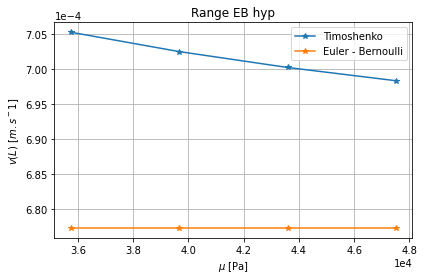

In [4]:
# Display result

plt.figure()
plt.plot(F, v_timo, '-*', label='Timoshenko')
plt.plot(F, np.array([v_EB for i in range(1,5)]), '*-', label='Euler - Bernoulli')

plt.title('Range EB hyp')
plt.xlabel(r'$\mu$ [Pa]')
plt.ylabel(r'$v(L)$ $[m.s^-1]$')

plt.legend(loc = 1)
plt.grid('True')

# Plot amelioration

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.tight_layout()

#### Disrtibuted loading case

In [28]:
## Additional DATA

f = 1 # [Pa] # Distributed force

# --------------------------------------------

## Solution

s = L
v_load    = s**4 * (-f/(24*D)) + s**3 * (f*L/(6*D)) + s**2 * (f/(2*F) + P*L/(2*D) - f*L**2/(4*D)) + s * ((P - f*L)/F)
v_EB_load = s**4 * (-f/(24*D)) + s**3 * (f*L/(6*D)) + s**2 * (P*L/(2*D) - f*L**2/(4*D))

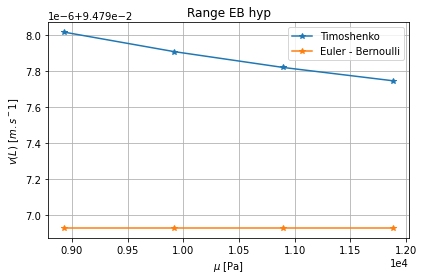

In [29]:
# Display result

plt.figure()
plt.plot(F, v_load, '-*', label='Timoshenko')
plt.plot(F, np.array([v_EB_load for i in range(1,5)]), '*-', label='Euler - Bernoulli')

plt.title('Range EB hyp')
plt.xlabel(r'$\mu$ [Pa]')
plt.ylabel(r'$v(L)$ $[m.s^-1]$')

plt.legend(loc = 1)
plt.grid('True')

# Plot amelioration

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.tight_layout()